In [1]:
# Calculate the mixing factor s2/(s2-s1)
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import os

In [2]:
xdis = np.linspace(0.1, 9.9, 50) # Distance (km) in x direction

gh = np.repeat(np.array([[.5],[1],[1.5],[4],[8]]),10) # Grid height

In [3]:
def Hydro(Hs):
    file = xr.open_dataset('/Users/weiyangbao/Documents/Model_outputs/State700/Hs_' + str(format(Hs,'03d')) + '.nc')
    state = file.isel(Y=range(1,10), T=range(60,len(file.T)))
    depth = state.Z.data
    s = state.S.data.mean(axis=(0,2))
    
    u0 = state.U.data # dims = T, Z, Y, Xp1
    u_x = (u0[:, :, :, 1:] + u0[:, :, :, :-1]) / 2 # Convert the value to grid center in x direction
    u = u_x.mean(axis=(0,2)) # dims = Z, X
    #u[u==0] = np.nan
       
    P = np.empty(len(xdis)-2)
    hr = np.empty(len(xdis)-2)
    for i in range(1,len(xdis)-1):           
        p = np.where(u[:,i] < 0)[-1][0]
        h1 = gh[:p].sum()
        s1 = np.sum(s[:p,i] * gh[:p]) / h1
        
        if sum(j < 0 for j in u[p:,i]) == len(gh)-p:
            n = len(gh) - p
        else:    
            n = np.where(u[p:,i] >= 0)[-1][0]
            
        h2 = gh[p:p+n].sum()
        s2 = np.sum(s[p:p+n,i] * gh[p:p+n]) / h2
            
        P[i-1] = s2 / (s2 - s1)
        hr[i-1] = h2 / (h1 + h2)
    return (P, hr)

Text(0.0, 1.0, '(d) $\\mathregular{H_s}$ = 110 m')

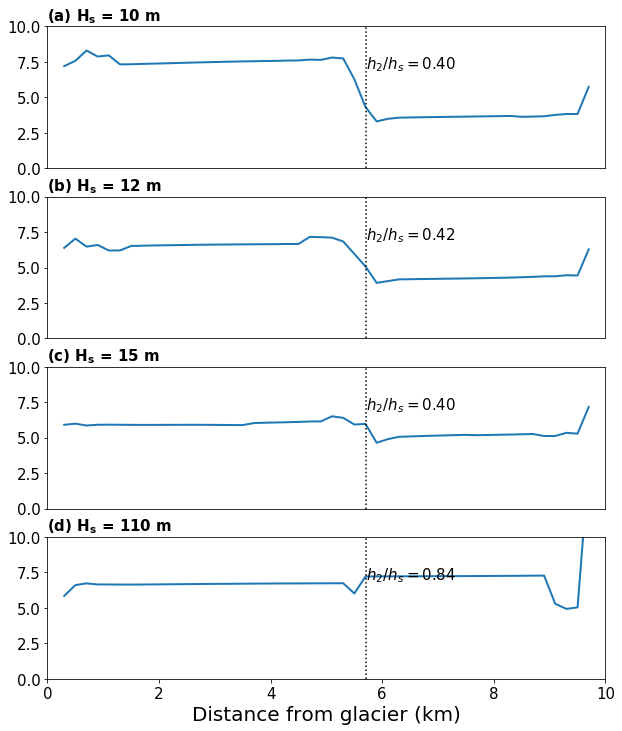

In [14]:
Hs = np.array([10, 12, 15, 110])

P1, hr1 = Hydro(Hs[0])
P2, hr2 = Hydro(Hs[1])
P3, hr3 = Hydro(Hs[2])
P4, hr4 = Hydro(Hs[3])


# Make plots
fig = plt.figure(figsize=(10,12))
#fig.tight_layout()
ax1 = fig.add_subplot(411)
ax1.plot(xdis[1:-1],P1,linewidth=2)
ax1.axvline(x=xdis[28],color='k',linestyle=':')
ax1.set_xlim([0,10])
ax1.set_ylim([0,10])
ax1.tick_params(axis='y', labelsize=15)
plt.text(xdis[28], 7, r'$h_2/h_s= $' + str(format(hr1[27],'.2f')), {'fontsize': 15})
ax1.axes.get_xaxis().set_visible(False)
ax1.set_title('(a) $\mathregular{H_s}$ = ' + str(Hs[0]) + ' m', loc='left', size=15, weight='bold')


ax2 = fig.add_subplot(412)
ax2.plot(xdis[1:-1],P2,linewidth=2)
ax2.axvline(x=xdis[28],color='k',linestyle=':')
ax2.tick_params(axis='y', labelsize=15)
ax2.set_xlim([0,10])
ax2.set_ylim([0,10])
plt.text(xdis[28], 7, r'$h_2/h_s= $' + str(format(hr2[27],'.2f')), {'fontsize': 15})
ax2.axes.get_xaxis().set_visible(False)
ax2.set_title('(b) $\mathregular{H_s}$ = ' + str(Hs[1]) + ' m', loc='left', size=15, weight='bold')


ax3 = fig.add_subplot(413)
ax3.plot(xdis[1:-1],P3,linewidth=2)
ax3.axvline(x=xdis[28],color='k',linestyle=':')
ax3.set_xlim([0,10])
ax3.set_ylim([0,10])
ax3.tick_params(axis='y', labelsize=15)
plt.text(xdis[28], 7, r'$h_2/h_s= $' + str(format(hr3[27],'.2f')), {'fontsize': 15})
ax3.axes.get_xaxis().set_visible(False)
ax3.set_title('(c) $\mathregular{H_s}$ = ' + str(Hs[2]) + ' m', loc='left', size=15, weight='bold')


ax4 = fig.add_subplot(414)
ax4.plot(xdis[1:-1],P4,linewidth=2)
ax4.axvline(x=xdis[28],color='k',linestyle=':')
ax4.set_xlim([0,10])
ax4.set_ylim([0,10])
plt.text(xdis[28], 7, r'$h_2/h_s= $' + str(format(hr4[27],'.2f')), {'fontsize': 15})
ax4.tick_params(axis='y', labelsize=15)
ax4.tick_params(axis='x', labelsize=15)
ax4.set_xlabel('Distance from glacier (km)', size=20)
ax4.set_title('(d) $\mathregular{H_s}$ = ' + str(Hs[3]) + ' m', loc='left', size=15, weight='bold')


In [15]:
hr1[27], hr2[27], hr3[27], hr4[27]

(0.4, 0.4166666666666667, 0.4, 0.8428571428571429)